<a href="https://colab.research.google.com/github/aaronjoel/DeepUnderstandingOfDeepLearning/blob/main/DUDL_FFNonMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline as mb
mb.set_matplotlib_formats('svg')

In [3]:
data = np.loadtxt(open('sample_data/mnist_train_small.csv', 'rb'), delimiter=',')

data.shape

(20000, 785)

In [4]:
# extract labels (number IDs) and remove from data
labels = data[:, 0]
data = data[:, 1:]

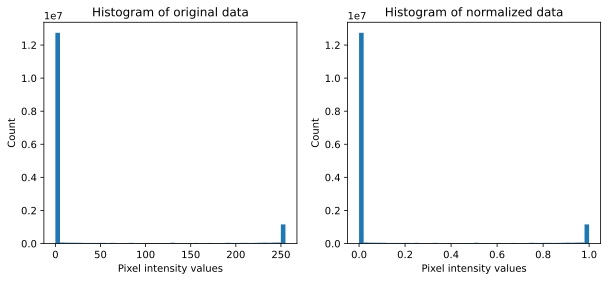

In [5]:
# Normalize the data to a range of [0 1]
dataNorm = data / (np.max(data) - np.min(data))

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].hist(data.flatten(), 50)
ax[0].set_xlabel('Pixel intensity values')
ax[0].set_ylabel('Count')
ax[0].set_title('Histogram of original data')

ax[1].hist(dataNorm.flatten(), 50)
ax[1].set_xlabel('Pixel intensity values')
ax[1].set_ylabel('Count')
ax[1].set_title('Histogram of normalized data')

plt.show()

In [6]:
# Step 1: convert to tensor
dataT = torch.tensor(dataNorm).float()
labelsT = torch.tensor(labels).long()

# Step 2: use scikitlearn to split the data
train_data, test_data, train_labels, test_labels = train_test_split(dataT, labelsT, test_size=0.1)

# Step 3: convert into PyTorch Datasets
train_data = TensorDataset(train_data, train_labels)
test_data = TensorDataset(test_data, test_labels)

# Step 4: translate into dataloader objects
batchsize = 32
train_loader = DataLoader(train_data, batch_size=batchsize, shuffle=True, drop_last=True)
test_loader  = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])

In [7]:
# Check all variables in workspace
%whos

Variable           Type             Data/Info
---------------------------------------------
DataLoader         type             <class 'torch.utils.data.dataloader.DataLoader'>
F                  module           <module 'torch.nn.functio<...>/torch/nn/functional.py'>
TensorDataset      type             <class 'torch.utils.data.dataset.TensorDataset'>
ax                 ndarray          2: 2 elems, type `object`, 16 bytes
batchsize          int              32
data               ndarray          20000x784: 15680000 elems, type `float64`, 125440000 bytes (119.62890625 Mb)
dataNorm           ndarray          20000x784: 15680000 elems, type `float64`, 125440000 bytes (119.62890625 Mb)
dataT              Tensor           tensor([[0., 0., 0.,  ...<...>, 0.,  ..., 0., 0., 0.]])
fig                Figure           Figure(1000x400)
labels             ndarray          20000: 20000 elems, type `float64`, 160000 bytes (156.25 kb)
labelsT            Tensor           tensor([6, 5, 7,  ..., 2, 9, 5]

In [8]:
# create a class for the model
def createTheMNISTNet():

  class mnistNet(nn.Module):

    def __init__(self):
      super().__init__()

      ## input layer
      self.input = nn.Linear(784, 64)

      ## hidden layer
      self.fc1 = nn.Linear(64, 32)
      self.fc2 = nn.Linear(32, 32)

      # output layer
      self.output = nn.Linear(32, 10)

    def forward(self, x):
      x = F.relu( self.input(x) )
      x = F.relu( self.fc1(x) )
      x = F.relu( self.fc2(x) )

      return torch.log_softmax( self.output(x), axis=1 )


  # create the model instance
  net = mnistNet()

  # loss function
  lossfun = nn.NLLLoss()

  # optimizer
  optimizer = torch.optim.SGD(net.parameters(), lr=.01)

  return net, lossfun, optimizer

In [9]:
# test the model with one batch
net, lossfun, optimizer = createTheMNISTNet()

X, y = next(iter(train_loader))
yHat = net(X)

# values are log-probability of each number (0-9)
print(torch.exp(yHat))

# Now let's compute the loss
loss = lossfun(yHat, y)
print(' ')
print('Loss:')
print(loss)

tensor([[0.0932, 0.0817, 0.1035, 0.0879, 0.0984, 0.0932, 0.1125, 0.1105, 0.1097,
         0.1094],
        [0.0933, 0.0817, 0.1049, 0.0889, 0.0966, 0.0929, 0.1142, 0.1092, 0.1096,
         0.1087],
        [0.0928, 0.0815, 0.1051, 0.0887, 0.0969, 0.0935, 0.1131, 0.1093, 0.1090,
         0.1101],
        [0.0928, 0.0818, 0.1019, 0.0882, 0.0980, 0.0939, 0.1117, 0.1117, 0.1096,
         0.1103],
        [0.0933, 0.0812, 0.1046, 0.0892, 0.0966, 0.0931, 0.1138, 0.1089, 0.1094,
         0.1099],
        [0.0923, 0.0836, 0.1021, 0.0883, 0.0984, 0.0926, 0.1125, 0.1126, 0.1090,
         0.1088],
        [0.0928, 0.0812, 0.1037, 0.0895, 0.0960, 0.0932, 0.1139, 0.1103, 0.1090,
         0.1103],
        [0.0915, 0.0828, 0.1035, 0.0899, 0.0971, 0.0907, 0.1132, 0.1117, 0.1097,
         0.1099],
        [0.0912, 0.0823, 0.1038, 0.0904, 0.0964, 0.0926, 0.1126, 0.1114, 0.1085,
         0.1108],
        [0.0927, 0.0815, 0.1029, 0.0890, 0.0982, 0.0936, 0.1121, 0.1107, 0.1085,
         0.1108],
        [0

In [10]:
sum(   [0.0929, 0.0817, 0.1039, 0.0893, 0.0962, 0.0930, 0.1137, 0.1097, 0.1097,
         0.1101],)

1.0002

In [16]:
def function2trainTheModel(num_epochs=60):
  # create a new model
  net, lossfun, optimizer = createTheMNISTNet()

  # initialize losses
  losses = torch.zeros(num_epochs)
  trainAcc = []
  testAcc  = []

  # loop over epochs
  for i in range(num_epochs):
    # loop over training data batches
    batchAcc = []
    batchLoss = []
    for X, y in train_loader:
      # forward pass and loss
      yHat = net(X)
      loss = lossfun(yHat, y)

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # loss from this batch
      batchLoss.append(loss.item())

      # compute accuracy
      matches = torch.argmax(yHat, axis=1) == y   # booleans (false/true)
      matchesNumeric = matches.float()            # convert to numbers (0/1)
      accuracyPct = 100*torch.mean(matchesNumeric)  # average and x100
      batchAcc.append( accuracyPct )                # add to list of accuracies
    # end of batch loop...

    # now that we've trained through the batches, get their average training accuracy
    trainAcc.append( np.mean(batchAcc) )

    # and get average losses across the batches
    losses[i] = np.mean(batchLoss)

    # test accuracy
    X, y = next(iter(test_loader)) # extract X, y from test dataloader
    yHat = net(X)

    # compare the following really long line of code to the training accuracy lines
    testAcc.append( 100 * torch.mean((torch.argmax(yHat, axis=1) == y).float() ) )

  # end epochs

  # function output
  return trainAcc, testAcc, losses, net


In [17]:
trainAcc, testAcc, losses, net = function2trainTheModel(num_epochs=100)

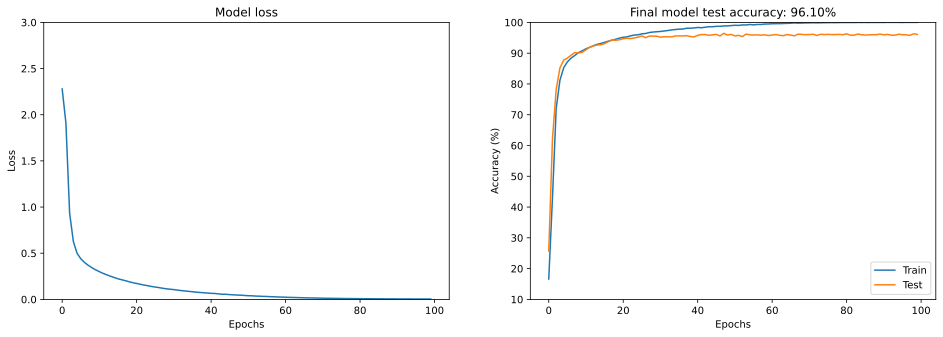

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

ax[0].plot(losses)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_ylim([0, 3])
ax[0].set_title('Model loss')

ax[1].plot(trainAcc, label='Train')
ax[1].plot(testAcc, label='Test')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_ylim([10, 100])
ax[1].set_title(f'Final model test accuracy: {testAcc[-1]:.2f}%')
ax[1].legend()

plt.show()

In [19]:
#  Run the model through for the test data
X, y = next(iter(test_loader))
preds = net(X).detach()
preds

tensor([[-1.5550e+01, -2.7801e+01, -2.4077e+01,  ..., -5.3860e+01,
         -7.0048e+00, -3.5564e+01],
        [-1.3693e+01, -2.7782e+01, -2.7509e+01,  ..., -4.0270e+01,
         -1.1248e+01, -2.4278e+01],
        [-2.0746e+01, -3.3815e+01, -2.7014e+01,  ..., -4.6910e+01,
          0.0000e+00, -3.8533e+01],
        ...,
        [-2.4654e+01, -2.2273e+01, -1.0944e+01,  ..., -2.0623e-05,
         -2.2347e+01, -1.2978e+01],
        [-1.8334e+01, -1.3083e+01, -1.7382e+01,  ..., -2.8602e+01,
         -9.5560e+00, -2.4450e+01],
        [-2.4896e+01, -1.8640e+01, -2.3477e+01,  ..., -2.5292e+01,
         -2.4936e+01, -2.2286e+01]])

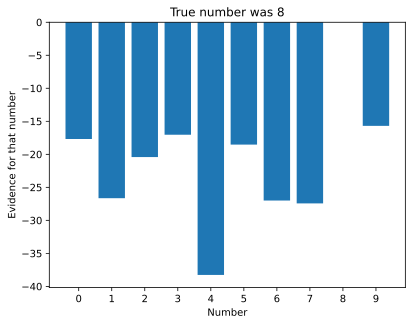

In [20]:
# Evidence for all numbers from one sample
sample2show = 120

plt.bar(range(10), preds[sample2show])
plt.xticks(range(10))
plt.xlabel('Number')
plt.ylabel('Evidence for that number')
plt.title('True number was %s' %y[sample2show].item())
plt.show()

In [21]:
# create a class for the model
def createTheMNISTNet():

  class mnistNet(nn.Module):
    def __init__(self):
      super().__init__()

      ### input layer
      self.input = nn.Linear(784,64)

      ### hidden layer
      self.fc1 = nn.Linear(64,32)
      self.fc2 = nn.Linear(32,32)

      ### output layer
      self.output = nn.Linear(32,10)

    # forward pass
    def forward(self,x):
      x = F.relu( self.input(x) )
      x = F.relu( self.fc1(x) )
      x = F.relu( self.fc2(x) )
      return torch.log_softmax( self.output(x),axis=1 )
      # NEW HERE: log-softmax the output, because I'm using NLLLoss instead of CrossEntropyLoss

  # create the model instance
  net = mnistNet()

  # loss function
  lossfun = nn.NLLLoss()

  # optimizer
  optimizer = torch.optim.SGD(net.parameters(),lr=.01)

  return net,lossfun,optimizer

In [22]:
# test the model with one batch
net,lossfun,optimizer = createTheMNISTNet()

X,y = next(iter(train_loader))
yHat = net(X)

# values are log-probability of each number (0-9)
# print(torch.exp(yHat))

# now let's compute the loss
loss = lossfun(yHat,y)
print(' ')
print('Loss:')
print(loss)

 
Loss:
tensor(2.2822, grad_fn=<NllLossBackward0>)


In [23]:
# a function that trains the model

def function2trainTheModel():

  # number of epochs
  numepochs = 60

  # create a new model
  net,lossfun,optimizer = createTheMNISTNet()

  # initialize losses
  losses    = torch.zeros(numepochs)
  trainAcc  = []
  testAcc   = []


  # loop over epochs
  for epochi in range(numepochs):

    # loop over training data batches
    batchAcc  = []
    batchLoss = []
    for X,y in train_loader:

      # forward pass and loss
      yHat = net(X)
      loss = lossfun(yHat,y)

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # loss from this batch
      batchLoss.append(loss.item())

      # compute accuracy
      matches = torch.argmax(yHat,axis=1) == y     # booleans (false/true)
      matchesNumeric = matches.float()             # convert to numbers (0/1)
      accuracyPct = 100*torch.mean(matchesNumeric) # average and x100
      batchAcc.append( accuracyPct )               # add to list of accuracies
    # end of batch loop...

    # now that we've trained through the batches, get their average training accuracy
    trainAcc.append( np.mean(batchAcc) )

    # and get average losses across the batches
    losses[epochi] = np.mean(batchLoss)

    # test accuracy
    X,y = next(iter(test_loader)) # extract X,y from test dataloader
    yHat = net(X)

    # compare the following really long line of code to the training accuracy lines
    testAcc.append( 100*torch.mean((torch.argmax(yHat,axis=1)==y).float()) )

  # end epochs

  # function output
  return trainAcc,testAcc,losses,net

In [24]:
trainAcc,testAcc,losses,net = function2trainTheModel()

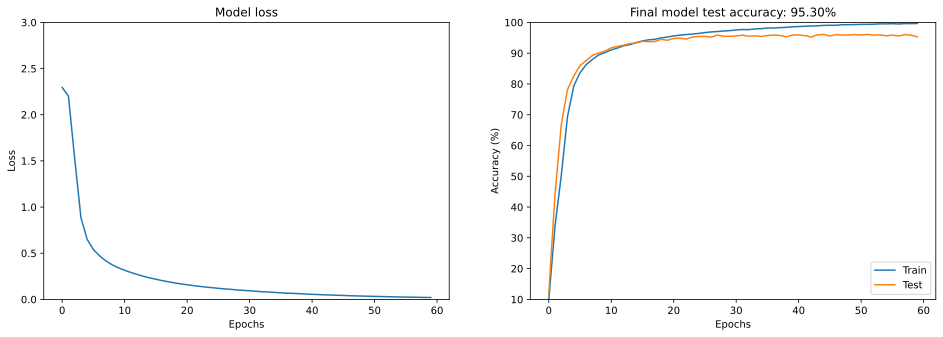

In [25]:
fig,ax = plt.subplots(1,2,figsize=(16,5))

ax[0].plot(losses)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_ylim([0,3])
ax[0].set_title('Model loss')

ax[1].plot(trainAcc,label='Train')
ax[1].plot(testAcc,label='Test')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_ylim([10,100])
ax[1].set_title(f'Final model test accuracy: {testAcc[-1]:.2f}%')
ax[1].legend()

plt.show()

In [26]:
# run the model through for the test data
X,y = next(iter(test_loader))
predictions = net(X).detach()

predictions

tensor([[-1.1576e+01, -2.2305e+01, -1.6846e+01,  ..., -3.1711e+01,
         -1.0473e+01, -3.5036e+01],
        [-1.3986e+01, -2.1908e+01, -2.2950e+01,  ..., -2.6515e+01,
         -7.5694e+00, -2.0146e+01],
        [-1.4583e+01, -2.6512e+01, -1.3483e+01,  ..., -3.1909e+01,
         -2.8610e-06, -3.0690e+01],
        ...,
        [-2.2151e+01, -1.1239e+01, -6.8468e+00,  ..., -1.3596e-03,
         -1.5928e+01, -1.4440e+01],
        [-2.7259e+01, -1.5863e+01, -2.2299e+01,  ..., -1.8310e+01,
         -9.4453e+00, -1.6387e+01],
        [-3.3604e+01, -1.2270e+01, -2.1915e+01,  ..., -1.0707e+01,
         -2.4288e+01, -2.3750e+01]])

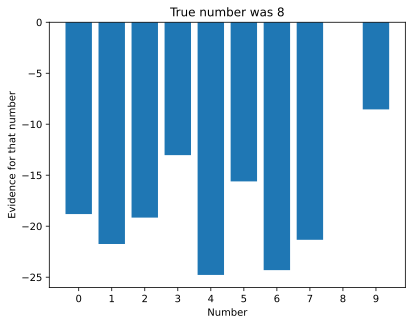

In [27]:
# Evidence for all numbers from one sample
sample2show = 120

plt.bar(range(10),predictions[sample2show]) # try adding exp!
plt.xticks(range(10))
plt.xlabel('Number')
plt.ylabel('Evidence for that number')
plt.title('True number was %s' %y[sample2show].item())
plt.show()

[  32   48   91   98  101  107  127  143  189  222  229  240  303  321
  332  355  362  377  423  444  446  467  473  482  495  500  536  549
  562  564  591  604  607  612  614  637  641  657  659  681  727  743
  775  867  870  920  947  990 1032 1037 1043 1053 1080 1086 1090 1118
 1221 1242 1250 1255 1277 1291 1300 1334 1340 1351 1400 1402 1406 1416
 1421 1451 1480 1516 1518 1531 1540 1566 1574 1595 1627 1628 1643 1673
 1689 1730 1769 1789 1837 1895 1932 1938 1978 1983]


<ipython-input-28-ace343a01d7e>:10: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  ax[0].bar(range(10),np.exp(predictions[errors[sample2show]]))


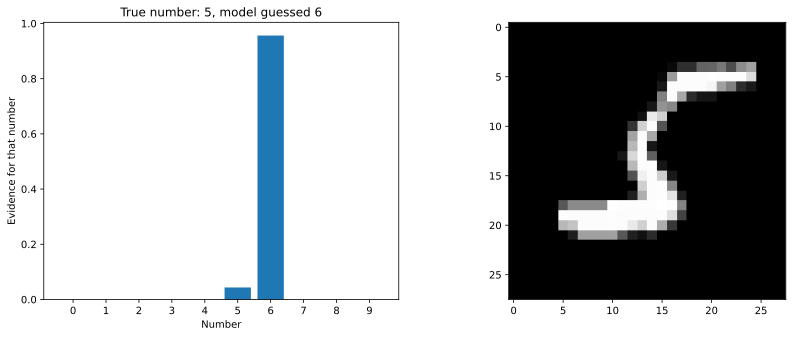

In [28]:
# find the errors
errors = np.where( torch.max(predictions,axis=1)[1] != y )[0]
print(errors)

# Evidence for all numbers from one sample
sample2show = 10

fig,ax = plt.subplots(1,2,figsize=(14,5))

ax[0].bar(range(10),np.exp(predictions[errors[sample2show]]))
ax[0].set_xticks(range(10))
ax[0].set_xlabel('Number')
ax[0].set_ylabel('Evidence for that number')
ax[0].set_title('True number: %s, model guessed %s'
                %( y[errors[sample2show]].item(), torch.argmax(predictions[errors[sample2show]]).item() ))

ax[1].imshow( np.reshape(X[errors[sample2show],:],(28,28)) ,cmap='gray')

plt.show()